In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns

2023-09-05 12:41:03.572210: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-05 12:41:03.625762: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-05 12:41:03.627239: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-05 12:41:04.695646: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
fields = ['eid', '34-0.0', '23104-0.0', '30740-0.0', '4079-0.0', '4080-0.0', '104920-0.0', '104910-0.0', '104900-0.0', 
        '104920-0.0', '104910-0.0', 
        '104900-0.0', '20107-0.0', '20110-0.0', '20111-0.0', 
        '30000-0.0', '30010-0.0', '4194-0.0', '30760-0.0', '30780-0.0', '130708-0.0']
    
ordered_cols = ['eid', 'Year-of-Birth', 'BMI', 'Glucose level', 'Systolic blood pressure', 'Diastolic blood pressure', 'time spent doing light physical activity', 'time spent doing moderate physical activity', 
        'time spent doing vigorous physical activity', 'Illnesses of father', 'Illnesses of mother', 'Illnesses of siblings',
        'white blood cell count', 'red blood cell count', 'Pulse rate','HDL cholesterol blood result','LDL cholesterol blood result','Diabetes report date']

ordered_cols_with_age = ['eid', 'Age', 'BMI', 'Glucose level', 'Systolic blood pressure', 'Diastolic blood pressure', 'time spent doing light physical activity', 'time spent doing moderate physical activity', 
        'time spent doing vigorous physical activity', 'Illnesses of father', 'Illnesses of mother', 'Illnesses of siblings',
        'white blood cell count', 'red blood cell count', 'Pulse rate','HDL cholesterol blood result','LDL cholesterol blood result','Diabetes report date']

ukb_fields = ['eid', '34-0.0', '4079-0.0', '4080-0.0',
                 '4194-0.0', '20107-0.0', '20110-0.0', '20111-0.0', '23104-0.0', '30000-0.0', '30010-0.0',
                 '30740-0.0', '30760-0.0', '30780-0.0',
                 '104900-0.0', '104910-0.0', '104920-0.0', '130708-0.0']

ukb_cols = ['eid', 'Year-of-Birth', 'Systolic blood pressure', 'Diastolic blood pressure',
               'Pulse rate', 'Illnesses of father', 'Illnesses of mother', 'Illnesses of siblings', 'BMI', 'white blood cell count', 'red blood cell count',
               'Glucose level', 'HDL cholesterol blood result', 'LDL cholesterol blood result',
               'time spent doing vigorous physical activity', 'time spent doing moderate physical activity', 'time spent doing light physical activity', 'Diabetes report date']


In [3]:
def create_plot(name, x_name, y_name, x_values, y_values, plot_type='vertical'):
    """
    Creates a plot based on the given data.

    Parameters:
        x_name (str): Label for the x-axis.
        y_name (str): Label for the y-axis.
        x_values (list): List of values for the x-axis.
        y_values (list): List of values for the y-axis.
        plot_type (str, optional): Type of plot to create ('vertical', 'horizontal', or 'pie').
                                   Default is 'vertical'.

    Returns:
        None
    """

    if plot_type not in ['vertical', 'horizontal', 'pie']:
        raise ValueError("Invalid plot type. Choose 'vertical', 'horizontal', or 'pie'.")

    if len(x_values) != len(y_values):
        raise ValueError("The number of x_values and y_values must be the same.")
    bar_width = 0.3
    if plot_type == 'vertical':
        plt.bar(x_values, y_values, width=bar_width)
        for i, value in enumerate(y_values):
            plt.text(i, value, str(value), ha='center', va='bottom')
        if(x_name != ''): plt.xlabel(x_name)
        plt.ylabel(y_name)
    elif plot_type == 'horizontal':
        plt.barh(x_values, y_values, height=bar_width)
        for i, value in enumerate(y_values):
            plt.text(value, i, str(value), ha='left', va='center')
        if(x_name != ''): plt.xlabel(y_name)
        plt.ylabel(x_name)
    elif plot_type == 'pie':
        plt.pie(y_values, labels=x_values, autopct='%1.1f%%')
        plt.axis('equal')
        
    plt.title(name)
    plt.show()

def plot_confusion_matrix(y_true, y_pred, labels, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize the confusion matrix

    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", linewidths=0.5, xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

def rank_features_by_importance(model, feature_names):
    # Get the feature importance scores from the first layer of the neural network
    feature_importance_scores = model.layers[1].get_weights()[0]
    
    # Calculate the absolute importance scores
    absolute_importance_scores = np.abs(feature_importance_scores)
    
    # Calculate the average importance score for each feature across all neurons in the first layer
    average_importance_scores = np.mean(absolute_importance_scores, axis=0)
    
    # Create a dictionary to map feature names to their importance scores
    feature_importance_dict = dict(zip(feature_names, average_importance_scores))
    
    # Sort the features based on their importance scores in descending order
    ranked_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
    
    return ranked_features

In [ ]:
ukbfile = 'biobank/ukb672220.csv' 

In [6]:
df_file = 'initial_dataset_with_all_fields.csv'

In [ ]:
family_df_file = 'family.csv'

In [ ]:
    chunk_size = 10 ** 3
    df = pd.read_csv(ukbfile, usecols=sorted_fields, chunksize = chunk_size)
    header = sorted_cols
    for chunk in df:
        chunk.to_csv(df_file, header=header, mode='a', index=False)
        header = False

In [ ]:
    lst = ['eid']
    base1='20107-'
    base2='20110-'
    base3='20111-'
    for num in range(1, 40):
        decimal_num = num / 10.0
        lst.append(f'{base1}{decimal_num:.1f}')
        lst.append(f'{base2}{decimal_num:.1f}')
        lst.append(f'{base3}{decimal_num:.1f}')
        chunk_size = 10 ** 3
    chunk_size = 10 ** 3
    df = pd.read_csv(ukbfile, usecols=lst, chunksize = chunk_size)
    header = True
    for chunk in df:
        chunk.to_csv(family_df_file, header=header, mode='a', index=False)
        header = False

In [ ]:
def transform_illness(df, field_name):
    df[field_name].where(df[field_name] == 9, other=0, inplace=True) # changes value to 0 if field isn't diabetes
    df[field_name].where(df[field_name] == 0, other=1, inplace=True) # changes value to 1 if the field is diabetes 
    df[field_name] = df[field_name].fillna(0) # changes value to 0 if missing

In [ ]:
def transform_activity(df, field_name):
    df[field_name].where(df[field_name] != 10, other=1, inplace=True)
    df[field_name].where(df[field_name] != 1030, other=5, inplace=True)
    df[field_name].where(df[field_name] != 3060, other=9, inplace=True)

In [ ]:
def modify_illness_list(df, field_name, other_field_name):

    transform_illness(df, other_field_name)

    filter1 = df[field_name]==0
    filter2 = df[other_field_name]==0

    df[field_name].where(filter1 & filter2, other=1, inplace=True) # value is 1 if it's 1 in one of those fields.
    df.drop([other_field_name], axis=1, inplace=True)

In [33]:
# read data
df = pd.read_csv(df_file)

In [34]:
# rearange the columns
df = df[ordered_cols]

In [35]:
# calculate age
df['Age'] = 2023 - df['Year-of-Birth']
df = df.drop(['Year-of-Birth'], axis=1)
df = df[ordered_cols_with_age]

In [37]:
# transform family illnesess
transform_illness(df, 'Illnesses of father')
transform_illness(df, 'Illnesses of mother')
transform_illness(df, 'Illnesses of siblings')
other_df = pd.read_csv('family.csv')
df = df.merge(right=other_df, how='left', on='eid')
for num in range(1, 40):
    decimal_num = num / 10.0
    modify_illness_list(df, 'Illnesses of father', f'20107-{decimal_num:.1f}')
    modify_illness_list(df, 'Illnesses of mother', f'20110-{decimal_num:.1f}')
    modify_illness_list(df, 'Illnesses of siblings', f'20111-{decimal_num:.1f}')

In [38]:
# resolve missing numeric parameters
fields_to_mean = ['BMI',
                  'Glucose level',
                  'Systolic blood pressure',
                  'Diastolic blood pressure', 
                  'Pulse rate',
                  'HDL cholesterol blood result', 
                  'LDL cholesterol blood result',
                  'white blood cell count',
                  'red blood cell count'
                 ]
df[fields_to_mean] = df[fields_to_mean].fillna(df[fields_to_mean].mean())

In [ ]:
# transform the moderate/vigorous activity data
transform_activity(df, 'time spent doing moderate physical activity')
transform_activity(df, 'time spent doing vigorous physical activity')

In [39]:
# resolve missing catagorial parameters
fields_to_median = ['Age', 'time spent doing light physical activity', 'time spent doing moderate physical activity', 'time spent doing vigorous physical activity']
df[fields_to_median] = df[fields_to_median].fillna(df[fields_to_median].median())

In [40]:
# resolve label
df["Diabetes report date"] = df["Diabetes report date"].fillna(0) # if there is no date, the person doesn't have diabetes.
df['Diabetes report date'].where(df['Diabetes report date'] == 0, other=1, inplace=True) # if there is a date, replace it with 1.
df.rename(columns={"Diabetes report date": "diabetes diagnosed"}, inplace=True)

In [41]:
# save df to csv
df.to_csv('processed_data.csv', index=False)

In [4]:
# load data
df = pd.read_csv('processed_data.csv')

negative_indices = df[df['diabetes diagnosed']==0].index
positive_indices = df[df['diabetes diagnosed']==1].index

print(df.shape[0])
print(len(negative_indices))
print(f'healthy people percent = {(len(negative_indices) / df.shape[0]):.4f}%')

num_to_keep = int(len(negative_indices) * 1 / 10)

print(f'num_to_keep = {num_to_keep}')

random_negative_indices = np.random.choice(negative_indices, num_to_keep, replace=False)
selected_indices = np.concatenate((positive_indices, random_negative_indices))
df = df.loc[selected_indices]

negative_indices = df[df['diabetes diagnosed']==0].index
positive_indices = df[df['diabetes diagnosed']==1].index

print(f'healthy people percent = {(len(negative_indices) / df.shape[0]):.4f}%')
print(f'sick people percent = {(len(positive_indices) / df.shape[0]):.4f}%')
print(f'df.shape = {df.shape[0]}')

502370
455764
healthy people percent = 0.9072%
num_to_keep = 45576
healthy people percent = 0.4944%
sick people percent = 0.5056%
df.shape = 92182


sick mean age: 74.40142900055787
sick min age: 53.0
sick max age: 87.0
sick unique values: [80. 75. 82. 68. 72. 70. 81. 66. 74. 76. 69. 55. 85. 62. 83. 64. 84. 65.
 73. 57. 67. 79. 77. 78. 58. 54. 71. 63. 59. 61. 60. 86. 56. 87. 53.]

healthy mean age: 71.14292610145691
healthy min age: 53.0
healthy max age: 87.0
healthy unique values: [81. 76. 72. 84. 73. 61. 56. 79. 65. 70. 75. 74. 82. 71. 62. 83. 78. 77.
 80. 59. 66. 67. 69. 57. 68. 64. 63. 85. 60. 58. 55. 87. 54. 86. 53.]


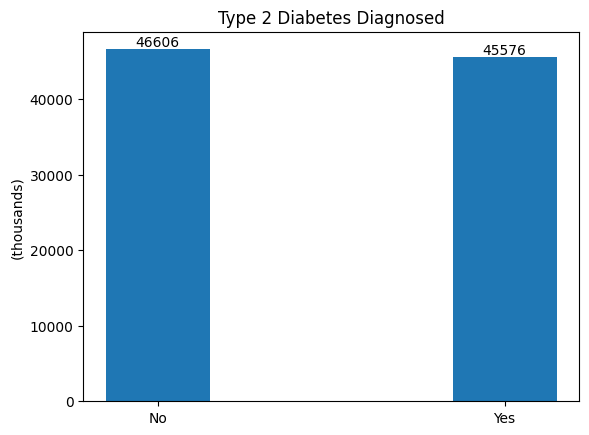

In [5]:
sick = df.loc[df['diabetes diagnosed']==1]
print(f"sick mean age: {sick['Age'].mean()}")
print(f"sick min age: {sick['Age'].min()}")
print(f"sick max age: {sick['Age'].max()}")
print(f"sick unique values: {sick['Age'].unique()}\n")

healthy = df.loc[df['diabetes diagnosed']==0]
print(f"healthy mean age: {healthy['Age'].mean()}")
print(f"healthy min age: {healthy['Age'].min()}")
print(f"healthy max age: {healthy['Age'].max()}")
print(f"healthy unique values: {healthy['Age'].unique()}")

num_positive = len(positive_indices)
num_negative = len(negative_indices)

create_plot('Type 2 Diabetes Diagnosed', '', '(thousands)', ['No', 'Yes'], [num_positive, num_negative], 'vertical')

In [7]:
# split the data into train and test
X = df.drop(columns=['eid', 'Age', 'diabetes diagnosed'])
#X = df.drop(columns=['Glucose level'])
y = df['diabetes diagnosed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# create and train the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# define a checkpoint to save the model's weights
import os
checkpoint_path = 'training_4/cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 save_weights_only=True,
                                                 verbose = 1)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[cp_callback])

Epoch 1/50
2066/2075 [============================>.] - ETA: 0s - loss: 0.4853 - accuracy: 0.7650
Epoch 1: saving model to training_4/cp.ckpt
2075/2075 [==============================] - 4s 2ms/step - loss: 0.4855 - accuracy: 0.7649 - val_loss: 0.4756 - val_accuracy: 0.7738
Epoch 2/50
2073/2075 [============================>.] - ETA: 0s - loss: 0.4742 - accuracy: 0.7715
Epoch 2: saving model to training_4/cp.ckpt
2075/2075 [==============================] - 3s 1ms/step - loss: 0.4741 - accuracy: 0.7715 - val_loss: 0.4777 - val_accuracy: 0.7768
Epoch 3/50
2050/2075 [============================>.] - ETA: 0s - loss: 0.4724 - accuracy: 0.7725
Epoch 3: saving model to training_4/cp.ckpt
2075/2075 [==============================] - 3s 1ms/step - loss: 0.4719 - accuracy: 0.7728 - val_loss: 0.4714 - val_accuracy: 0.7783
Epoch 4/50
2068/2075 [============================>.] - ETA: 0s - loss: 0.4692 - accuracy: 0.7725
Epoch 4: saving model to training_4/cp.ckpt
2075/2075 [======================

577/577 [==============================] - 1s 2ms/step - loss: 0.4782 - accuracy: 0.7730
Test loss: 0.4782, Test accuracy: 0.7730
577/577 [==============================] - 1s 2ms/step


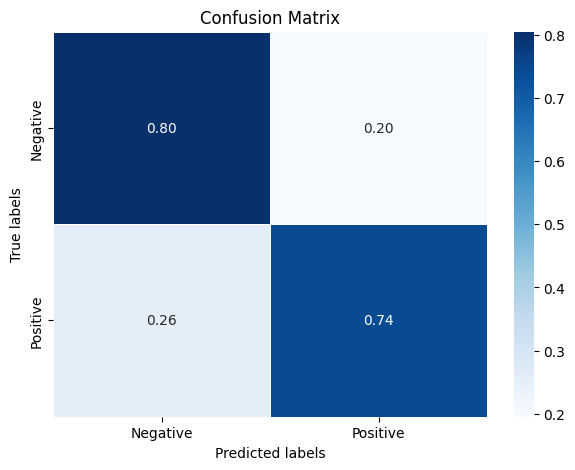

In [9]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
y_pred = np.round(y_pred)

# Compute and print the confusion matrix
plot_confusion_matrix(y_test, y_pred, ['Negative', 'Positive'])



In [11]:
features = [feature for feature in X.columns]
rank_features_by_importance(model, features)

[('time spent doing moderate physical activity', 0.34561032),
 ('white blood cell count', 0.31806508),
 ('Glucose level', 0.3127838),
 ('LDL cholesterol blood result', 0.30751434),
 ('time spent doing light physical activity', 0.30421054),
 ('time spent doing vigorous physical activity', 0.30415738),
 ('Systolic blood pressure', 0.29265785),
 ('HDL cholesterol blood result', 0.29214135),
 ('red blood cell count', 0.28897825),
 ('Illnesses of father', 0.2882375),
 ('Diastolic blood pressure', 0.28071192),
 ('Illnesses of siblings', 0.27914113),
 ('Illnesses of mother', 0.27749974),
 ('BMI', 0.27220464),
 ('Pulse rate', 0.26031706)]